In [38]:
# napi középhőmérséklet adatok 1951-1988 között

# beolvasás: Nyíregyháza
nyir_hom <- read.table("http://zempleni.elte.hu/nyir-51-88m.hom")

# Karcag, az eredmény 1 oszlopos mátrix
karc_hom <- read.table("http://zempleni.elte.hu/karc-51-88.hom")

In [39]:
summary(nyir_hom)

       V1         
 Min.   :-21.000  
 1st Qu.:  2.200  
 Median : 10.300  
 Mean   :  9.739  
 3rd Qu.: 17.500  
 Max.   :232.000  

In [40]:
plot_hom <- function(hom_data) {
  r=c(0:37) #az egész számok 0 és 37 között
  par(mfrow=c(1,1)) # grafikus beállítás: 1 ábra
  minb=rep(0, times=365)
  maxb=minb
  for (i in 1:365) {
    bpi <- hom_data[365*r+i,1]
    minb[i]=min(bpi)
    maxb[i]=max(bpi)
  }

  plot(minb,type="l",col=4,ylim=c(min(minb),max(maxb))) # ábra készítés. "l": vonalas,
  # az y tengelyt manuálisan állítjuk be, mert másik görbe is lesz
  lines(maxb,col=2)
}


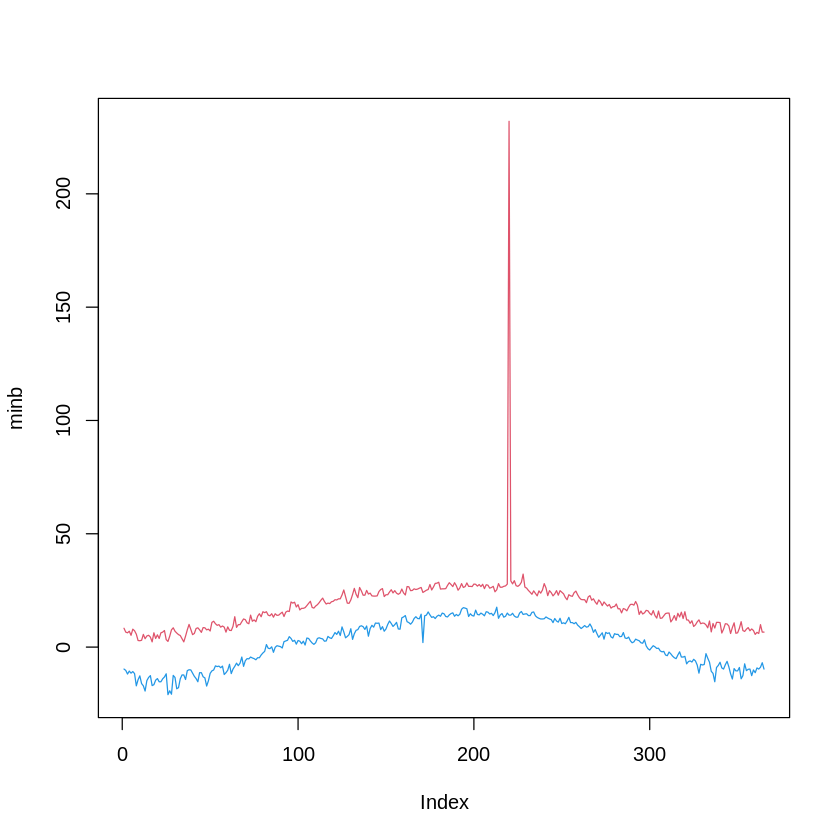

In [41]:
plot_hom(nyir_hom)

### Strategy for removing outliers
We classify outliers the same as a box plot would.

That is, a datapoint with value $x$ is classified as an outlier if:
$$
x \le Q_1 - 1.5 \cdot \text{IQR}
$$
or
$$
Q_3 + 1.5 \cdot \text{IQR} \le x
$$

In this case we substitute with the historical daily average temperature.

In [42]:
replace_outliers_with_mean <- function(data, column) {
  Q1 <- quantile(data[[column]], 0.25)
  Q3 <- quantile(data[[column]], 0.75)
  IQR <- IQR(data[[column]])
  lower_bound <- Q1 - 1.5 * IQR
  upper_bound <- Q3 + 1.5 * IQR

  daily_means = rep(0, times=365)
  for (i in 1:365) {
    daily_means[i] <- mean(data[[column]][i + c(0:37)], na.rm = TRUE)
  }

  # replace outliers with the daily average temperature
  for (i in 1:nrow(data)) {
    if (is.na(data[[column]][i])) {
    }
    if (data[[column]][i] < lower_bound || data[[column]][i] > upper_bound) {
      data[[column]][i] <- daily_means[i %% 365]
    }
  }

  return(data)
}


In [43]:
cleaned_nyir_hom <- replace_outliers_with_mean(nyir_hom, 1)
summary(cleaned_nyir_hom)

       V1         
 Min.   :-19.400  
 1st Qu.:  2.200  
 Median : 10.300  
 Mean   :  9.727  
 3rd Qu.: 17.500  
 Max.   : 32.200  

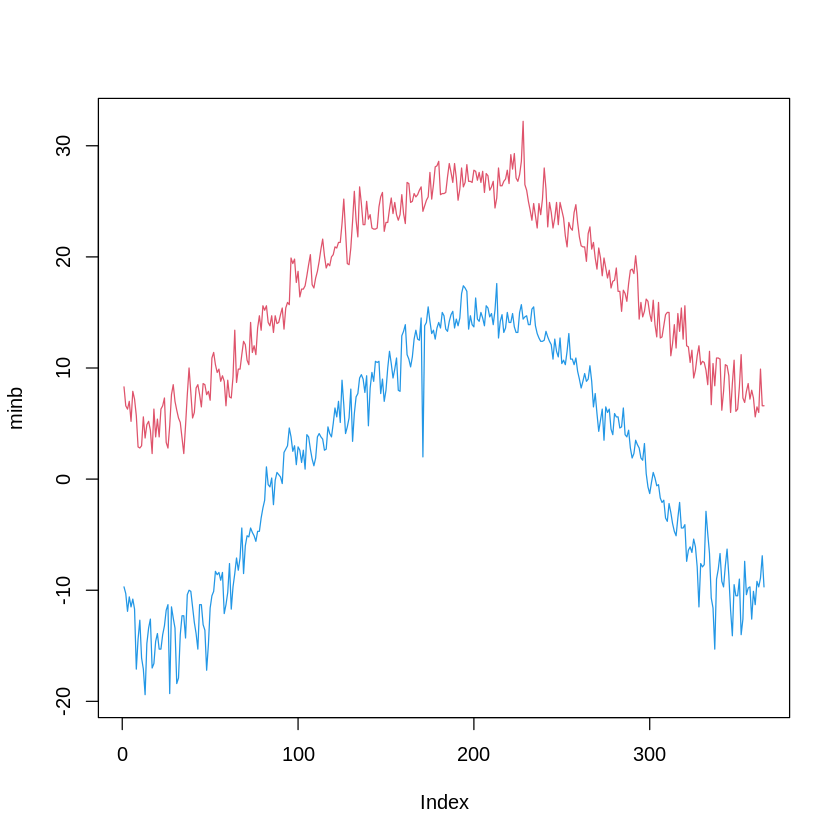

In [44]:
plot_hom(cleaned_nyir_hom)